## CIFO Gaussian Initialization Analysis_1

Let's try to make use of the logger.

Idea -> Load Data into Frame and compute statistics and graphs

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [46]:
headers = ["iteration", "elite.fitness", "elite.validation_fitness", "ps", "selection_method", "crossover_method", "p_c",
                             "mutation_method", "None", "None", "p_m", "phenotypic_diversity_shift"]

In [53]:
#loading CSV of CIFO data
gaussian_1 = pd.read_csv("gaussian_1.csv",
                             sep= ",",
                             header = None,
                             names = headers)
gaussian_1["With_Gaussian"] = False

gaussian_2 = pd.read_csv("gaussian_2.csv",
                             sep= ",",
                             header = None,
                             names = headers)
gaussian_2["With_Gaussian"] = True

gaussian_3 = pd.read_csv("gaussian_3.csv",
                             sep= ",",
                             header = None,
                             names = headers)
gaussian_3["With_Gaussian"] = False

gaussian_4 = pd.read_csv("gaussian_4.csv",
                             sep= ",",
                             header = None,
                             names = headers)
gaussian_4["With_Gaussian"] = True

gaussian_5 = pd.read_csv("gaussian_5.csv",
                             sep= ",",
                             header = None,
                             names = headers)
gaussian_5["With_Gaussian"] = False

gaussian_6 = pd.read_csv("gaussian_6.csv",
                             sep= ",",
                             header = None,
                             names = headers)
gaussian_6["With_Gaussian"] = True


gaussian = pd.concat([gaussian_2, gaussian_3, gaussian_4, gaussian_5])
gaussian = gaussian.reset_index(drop=True)
gaussian = gaussian.drop(["None", "None.1"], axis=1)

In [54]:
gaussian.head()

iteration  elite.fitness  elite.validation_fitness  ps  \
0          0       0.134096                  0.124481  10   
1          1       0.152807                  0.153527  10   
2          2       0.162162                  0.165975  10   
3          3       0.162162                  0.165975  10   
4          4       0.162162                  0.165975  10   

       selection_method     crossover_method  p_c mutation_method   p_m  \
0  tournament_selection  one_point_crossover  0.2   ball_mutation  0.99   
1  tournament_selection  one_point_crossover  0.2   ball_mutation  0.99   
2  tournament_selection  one_point_crossover  0.2   ball_mutation  0.99   
3  tournament_selection  one_point_crossover  0.2   ball_mutation  0.99   
4  tournament_selection  one_point_crossover  0.2   ball_mutation  0.99   

   phenotypic_diversity_shift  With_Gaussian  
0                    0.001555           True  
1                    0.001256           True  
2                   -0.006008           True  
3                    0.003495           True  
4                   -0.002460           True

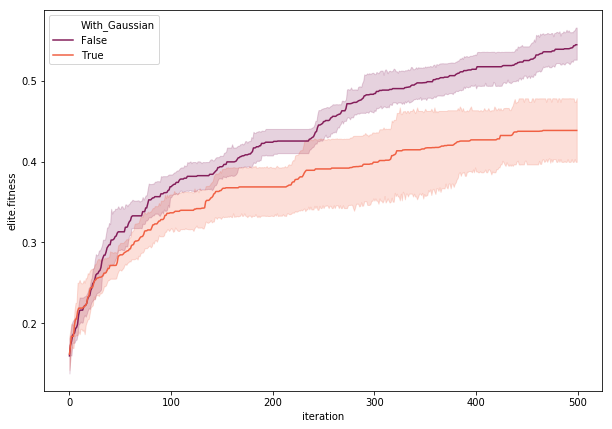

In [19]:
plt.subplots(figsize=(10,7))
sns.lineplot(x="iteration",
             y="elite.fitness",
             hue="With_Gaussian",
             data=gaussian.loc[gaussian["population_size"]==10,:],
            palette= "rocket",
            err_style="band",
            legend="full")

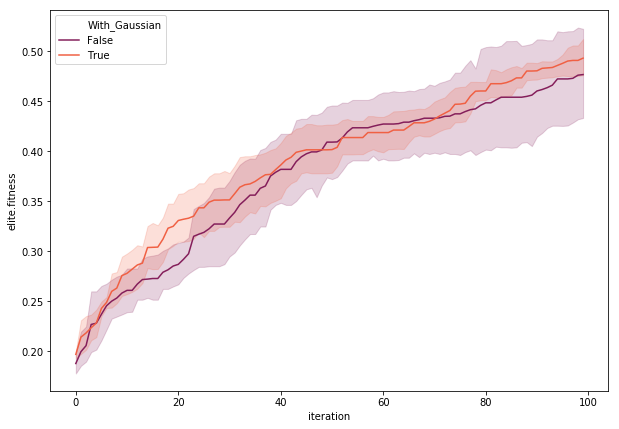

In [20]:
plt.subplots(figsize=(10,7))
sns.lineplot(x="iteration",
             y="elite.fitness",
             hue="With_Gaussian",
             data=gaussian.loc[gaussian["population_size"]==50,:],
            palette= "rocket",
            err_style="band",
            legend="full")

In [51]:
gaussian_final = gaussian_3.loc[gaussian_3["iteration"]== 499,:]
gaussian_final = gaussian_final.reset_index(drop=True)
gaussian_final = gaussian_final.drop(["None", "None.1"], axis=1)
gaussian_final["unseen_accuracy"] = [0.5, 0.5, 0.44, 0.54, 0.5]
gaussian_final["Radius"] =1
gaussian_final["pressure"]=0.8

In [55]:
gaussian_final.loc[:,["elite.fitness","unseen_accuracy","ps", "selection_method", "crossover_method","p_c", "mutation_method", "p_m", "Radius", "pressure"]]

elite.fitness  unseen_accuracy  ps      selection_method  \
0       0.538462             0.50  10  tournament_selection   
1       0.514553             0.50  10  tournament_selection   
2       0.545738             0.44  10  tournament_selection   
3       0.583160             0.54  10  tournament_selection   
4       0.540541             0.50  10  tournament_selection   

      crossover_method  p_c mutation_method   p_m  Radius  pressure  
0  one_point_crossover  0.2   ball_mutation  0.99       1       0.8  
1  one_point_crossover  0.2   ball_mutation  0.99       1       0.8  
2  one_point_crossover  0.2   ball_mutation  0.99       1       0.8  
3  one_point_crossover  0.2   ball_mutation  0.99       1       0.8  
4  one_point_crossover  0.2   ball_mutation  0.99       1       0.8

In [37]:
gaussian_final

iteration  elite.fitness  elite.validation_fitness  population_size  \
0        499       0.538462                  0.506224               10   
1        499       0.514553                  0.531120               10   
2        499       0.545738                  0.518672               10   
3        499       0.583160                  0.531120               10   
4        499       0.540541                  0.497925               10   

       selection_method     crossover_method  crossover_rate mutation_method  \
0  tournament_selection  one_point_crossover             0.2   ball_mutation   
1  tournament_selection  one_point_crossover             0.2   ball_mutation   
2  tournament_selection  one_point_crossover             0.2   ball_mutation   
3  tournament_selection  one_point_crossover             0.2   ball_mutation   
4  tournament_selection  one_point_crossover             0.2   ball_mutation   

   mutation_rate  phenotypic_diversity_shift  With_Gaussian  unseen_accuracy  
0           0.99                    0.010352          False             0.50  
1           0.99                    0.001781          False             0.50  
2           0.99                    0.008724          False             0.44  
3           0.99                    0.000660          False             0.54  
4           0.99                   -0.029379          False             0.50